# From Data to Action: Machine Learning Approaches for Predicting Tobacco-Free Policy Implementation in Schools 
## SVM Radial 

Loading imputed dataset

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as st


%matplotlib ipympl
plt.rcParams['xtick.major.pad']='4'
plt.rcParams['ytick.major.pad']='4'
plt.rcParams["font.family"] = "sans-serif"
plt.style.use("seaborn-v0_8-poster")

IMAGES_PATH = Path() / "plots"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
# Read the two dataframes
df = pd.read_csv('/main/tobaccoFree/data/imputed_data2.csv')


df.head()

,Dist,Q1,Q2,Q3,Q4,Q5A,Q6,Q7,Q8,Q9,...,teachNeedReminders,mstParentsSchoolEvents,parentsTbccoBigThreat,mstParentsReqTF,teachNumTraining,teachAwardsGov,isPTA,parentEduLevl,numBlank,tobaccoFree
0,13.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4.0,3.0,1.0,2.0,8.0,1.0,1.0,7.0,16.0,1.0
1,13.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,10.0,1.0,1.0,7.0,16.0,1.0
2,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,4.0,4.0,1.0,4.0,2.0,1.0,7.0,16.0,1.0
3,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,4.0,3.0,5.0,2.0,1.0,7.0,16.0,1.0
4,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,4.0,4.0,1.0,2.0,1.0,7.0,16.0,1.0


## Preparing for the model

Getting x and y variables

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
np.random.seed(42)
X = df.drop(['tobaccoFree'], axis=1)
y = df['tobaccoFree']



Original frequency histogram

In [ ]:
X.hist(figsize = (30,20))
save_fig("unscaled_bar_plot")  
plt.show()

Scaling features data

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X))

*scaliling with standardization allows for faster convergence by setting mean to 0 and std dev to 1*

train test split

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


Perform PCA and Factor Analysis and get feature correlation to Dimensions

In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis

#Perform PCA
pca = PCA(n_components=2)
X_train2D = pca.fit_transform(X_train)
X_test2D = pca.fit_transform(X_test)

pca4 = PCA(n_components=8)
X_train4D = pca4.fit_transform(X_train)
X_test4D = pca4.fit_transform(X_test)

pca11 = PCA(n_components=5)
X_train8D = pca11.fit_transform(X_train)
X_test8D = pca11.fit_transform(X_test)

# Perform Factor Analysis
famd = FactorAnalysis(n_components=123, max_iter=1000)
X_train_fa = famd.fit_transform(X_train)
X_test_fa = famd.fit_transform(X_test)

# Get the feature names from the dataframe
feature_names = df.drop(['tobaccoFree'], axis=1).columns
n_factors = X_train_fa.shape[1]
# Calculate the correlation coefficients with PCA components
pca_corr = pd.DataFrame(abs(pca.components_.T), columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=feature_names)

# Calculate the correlation coefficients with Factor Analysis components
fa_corr = pd.DataFrame(abs(famd.components_.T), columns=[f'FA{i+1}' for i in range(famd.n_components)], index=feature_names)

Plot the correlation coefficients for PCA (top 11 variables)

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6))
for i in range(pca.n_components_-1):
    top_vars = pca_corr[f'PC{i+1}'].sort_values(ascending=False)[:11]
    top_vars.plot(kind='bar', ax=ax)
    ax.set_title(f'Correlations between Variables and PCA Component {i+1} (Top 11)')
    ax.set_xlabel('Variables')
    ax.set_ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
save_fig('p')
plt.show()

Plot the correlation coefficients for Factor Analysis (top 11 variables)

In [23]:
fa_corr

,FA1,FA2,FA3,FA4,FA5,FA6,FA7,FA8,FA9,FA10,...,FA114,FA115,FA116,FA117,FA118,FA119,FA120,FA121,FA122,FA123
Dist,0.194496,0.114333,0.076167,0.366114,0.115336,0.142221,0.041227,0.614856,0.109482,0.564582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q1,0.191073,0.147514,0.028322,0.130346,0.076394,0.096101,0.150436,0.094742,0.196960,0.086418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q2,0.210712,0.197793,0.073286,0.030848,0.185011,0.060050,0.047155,0.174301,0.171675,0.131837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q3,0.115075,0.019844,0.115647,0.139009,0.057601,0.268063,0.016312,0.239642,0.036471,0.069419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q4,0.117476,0.067182,0.034303,0.120530,0.019886,0.314357,0.172202,0.189895,0.078892,0.005125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
teachNumTraining,0.150418,0.008757,0.086983,0.087951,0.035256,0.196869,0.101539,0.080627,0.092403,0.097454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
teachAwardsGov,0.037094,0.050296,0.101327,0.068149,0.096510,0.027757,0.024500,0.039518,0.102877,0.073853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
isPTA,0.318267,0.338841,0.141743,0.225290,0.302392,0.148323,0.159054,0.053293,0.154921,0.093671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
parentEduLevl,0.055286,0.134033,0.112530,0.077794,0.084527,0.029580,0.120405,0.130752,0.166309,0.162609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


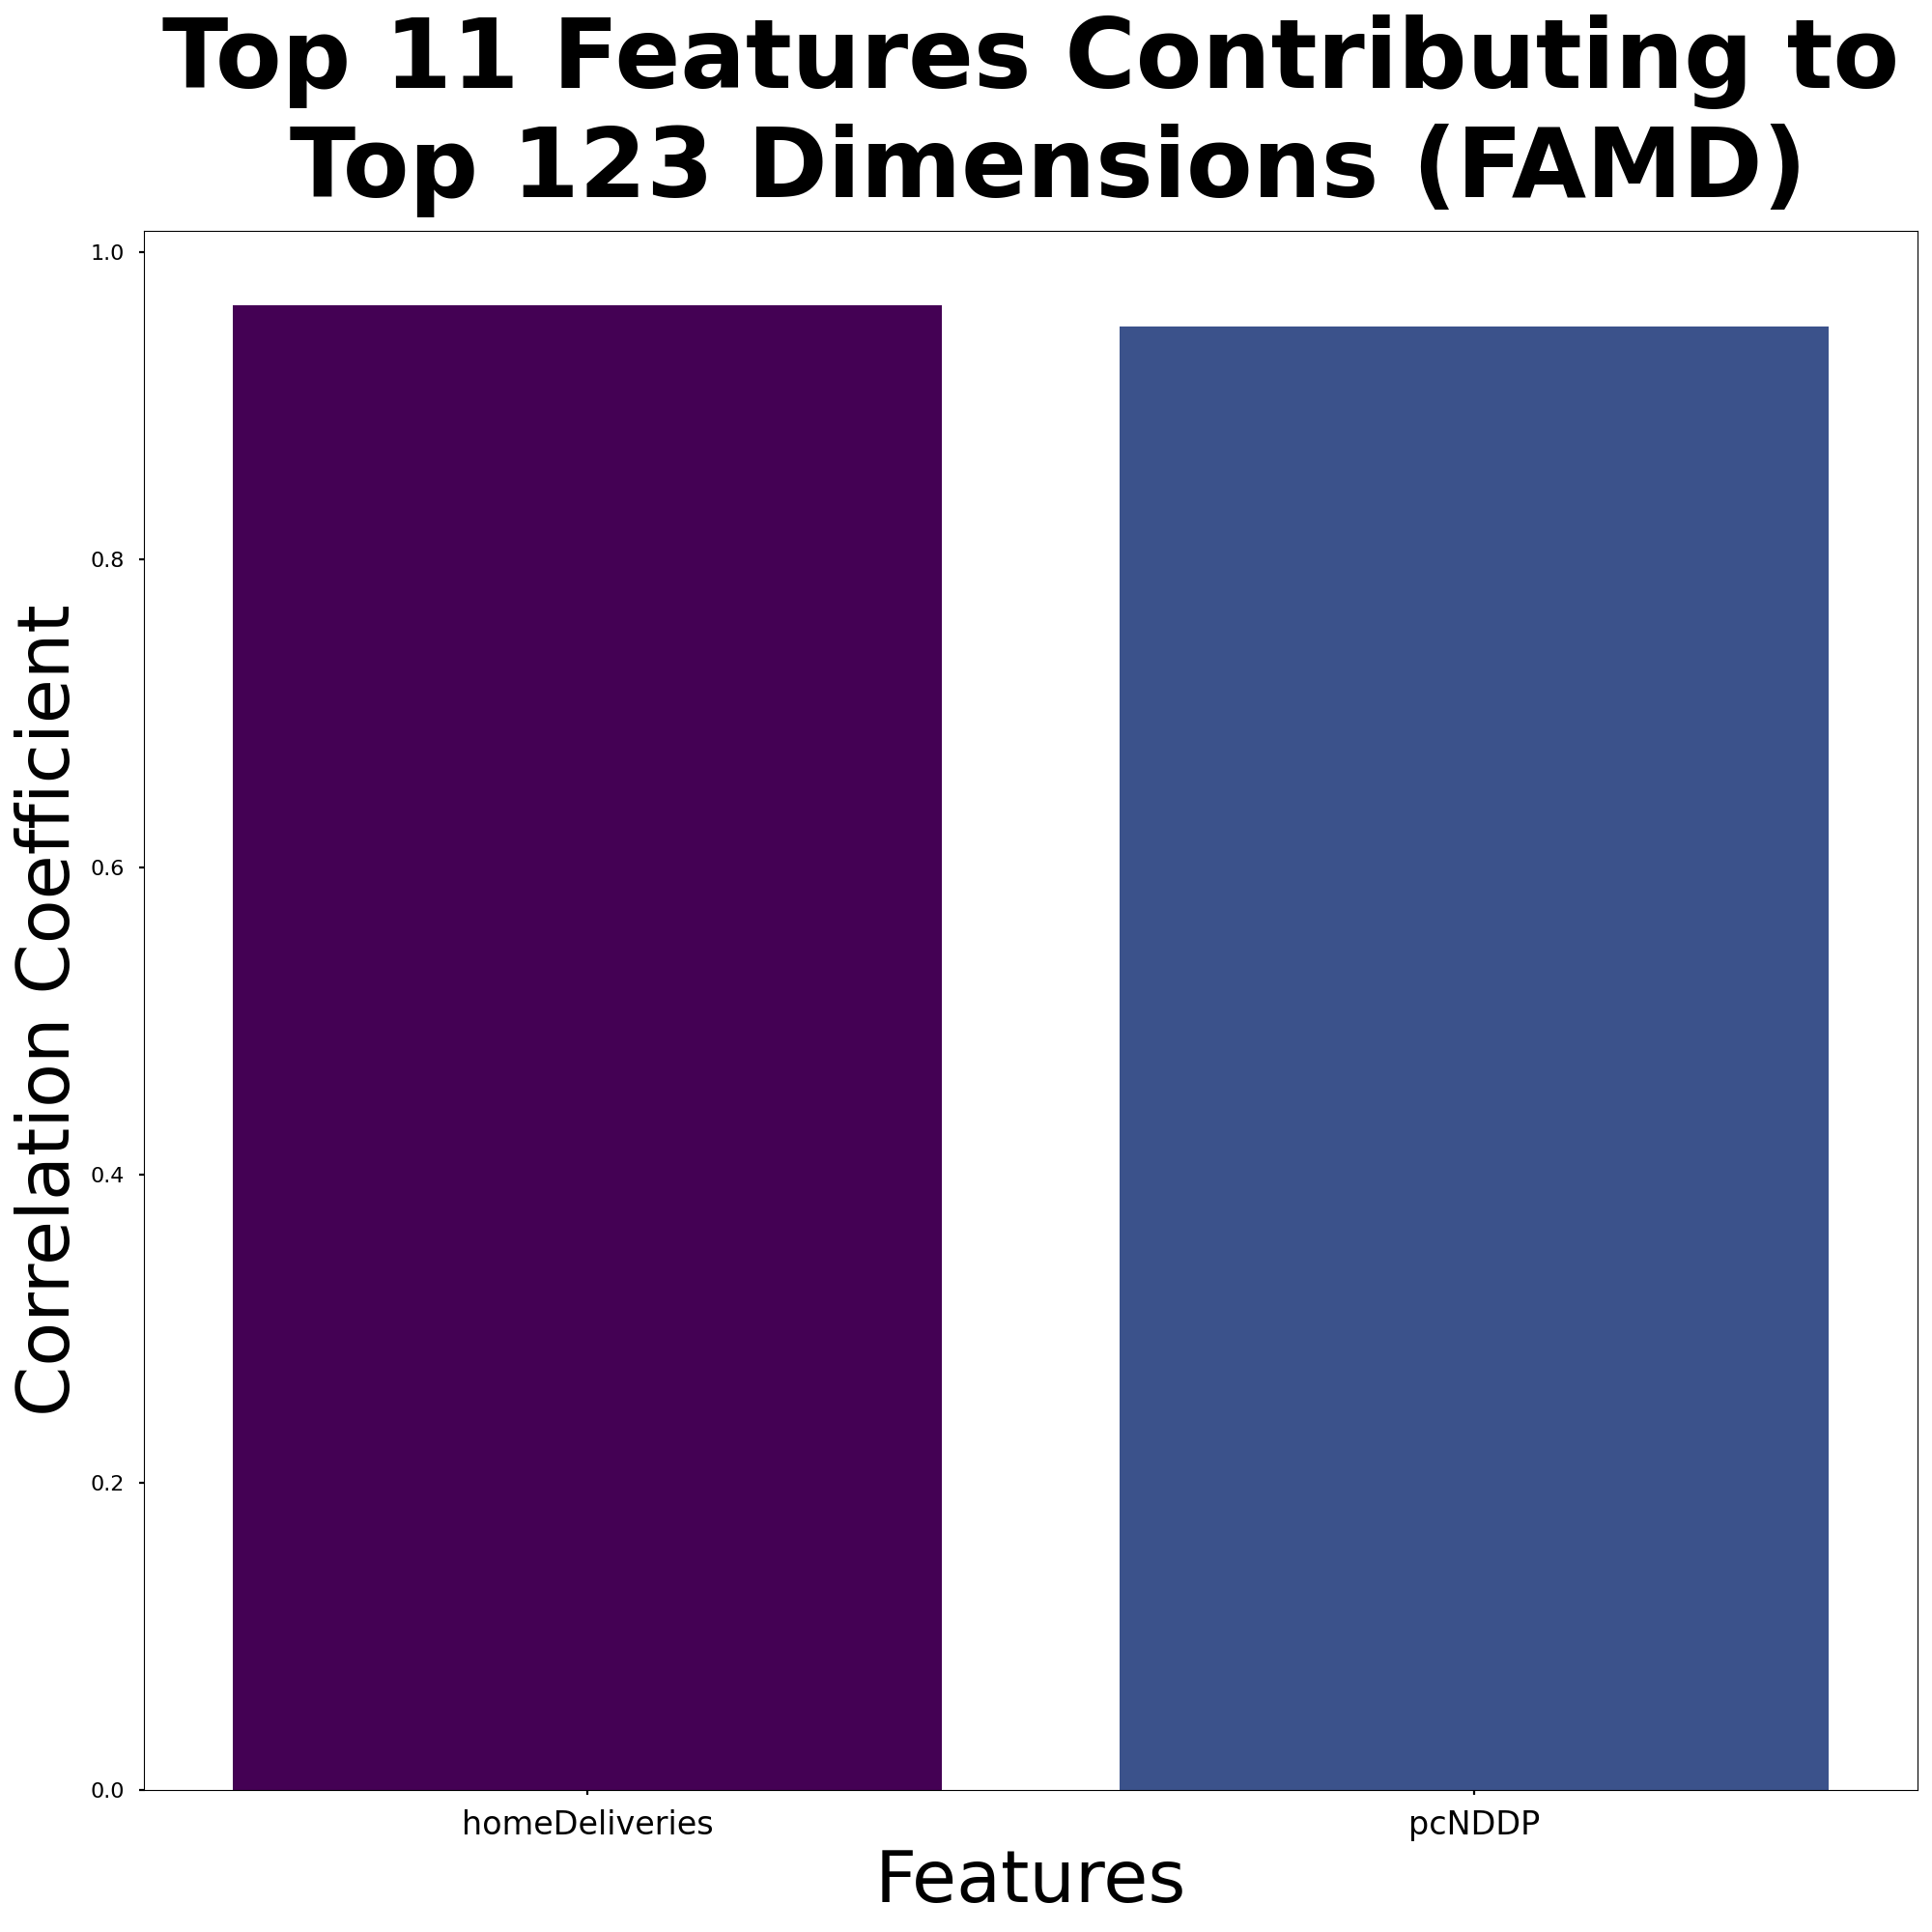

In [38]:
import random
fig, ax = plt.subplots(figsize=(20, 20))

cmap = plt.get_cmap('viridis', 5)  # Adjust colormap for total number of bars

top_vars = fa_corr[f'FA{1}'].sort_values(ascending=False)[:2]
# Get the default bar colors from seaborn
colors = sns.barplot(ax=ax, x=top_vars.index, y=top_vars).patches

# Assign gradient colors to each bar
for i, bar in enumerate(colors):
    bar.set_facecolor(cmap(i))



ax.set_title(f'Top 11 Features Contributing to\n Top {123} Dimensions (FAMD)', pad=25, size=72,fontweight='bold')
ax.set_xlabel('Features',fontsize=54)
ax.set_ylabel('Correlation Coefficient',fontsize=54)

plt.xticks(rotation=0, fontsize=24)
plt.tight_layout()
save_fig('FAMD')
plt.show()

Running SVM Models and checking accuracy

In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis

svm_with_kernel = SVC(gamma='auto', kernel='rbf', probability=True)
svm_with_kernel.fit(X_train, y_train) 
y_pred = svm_with_kernel.predict(X_test)
precision = accuracy_score(y_pred, y_test) * 100
print("Accuracy with Not-Linear SVM: {0:.2f}%".format(precision))

# svm_with_kernel = SVC(gamma='auto', kernel='rbf', probability=True)
# svm_with_kernel.fit(X_train2D, y_train) 
# y_pred = svm_with_kernel.predict(X_test2D)
# precision = accuracy_score(y_pred, y_test) * 100
# print("Accuracy with Not-Linear SVM + PCA considering only 2 PCs: {0:.2f}%".format(precision))

# svm_with_kernel = SVC(gamma='auto', kernel='rbf', probability=True)
# svm_with_kernel.fit(X_train4D, y_train) 
# y_pred = svm_with_kernel.predict(X_test4D)
# precision = accuracy_score(y_pred, y_test) * 100
# print("Accuracy with Not-Linear SVM + PCA considering only 4 PCs: {0:.2f}%".format(precision))

svm_with_kernel = SVC(gamma='auto', kernel='rbf', probability=True)
svm_with_kernel.fit(X_train8D, y_train) 
y_pred = svm_with_kernel.predict(X_test8D)
precision = accuracy_score(y_pred, y_test) * 100
print("Accuracy with Not-Linear SVM + PCA considering only 8 PCs: {0:.2f}%".format(precision))

# svm_with_kernel = SVC(gamma='auto', kernel='rbf', probability=True)
# svm_with_kernel.fit(X_train_fa, y_train) 
# y_pred = svm_with_kernel.predict(X_test_fa)
# precision = accuracy_score(y_pred, y_test) * 100
# print("Accuracy with Not-Linear SVM + FAMD considering n Factors: {0:.2f}%".format(precision))

# pred_kfold = cross_val_score(svm_with_kernel, X_train, y_train, cv=10) 
# print("Accuracy with SVM and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))

# pred_kfold = cross_val_score(svm_with_kernel, X_train2D, y_train, cv=10) 
# print("Accuracy with SVM and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))

pred_kfold = cross_val_score(svm_with_kernel, X_train8D, y_train, cv=10) 
print("Accuracy with SVM and 10-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))


# pred_kfold = cross_val_score(svm_with_kernel, X_train_fa, y_train, cv=10) 
# print("Accuracy with SVM and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))


Accuracy with Not-Linear SVM: 96.75%
Accuracy with Not-Linear SVM + PCA considering only 8 PCs: 90.24%
Accuracy with SVM and 10-FOLD CROSS VALIDATION: 0.97 (+/- 0.04)


Plotting decision boundaries

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
plot_decision_regions(X_train2D, y_train.values.astype(np.int_), clf=svm_with_kernel, legend=1, ax=ax)
plt.xlabel('PC1',fontsize=54)
plt.ylabel('PC2',fontsize=54)
ax.set_title("Radial Kernel SVM\n Decision Boundaries", pad=25, size=72)
ax.title.set_fontweight('bold')
ax.legend(title='Tobacco Free',title_fontsize=54,prop={'size':44,}, markerscale=5)
ax.text(-7.5, -2.3, "Accuracy with SVM and 10-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2), fontsize=24, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
#plt.title('Radial Kernel SVM Decision Boundaries')

save_fig('svm')
plt.show()

Plot Explained Variance Scree Plot

In [ ]:
import random
per_var = np.round(pca11.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

fig, ax = plt.subplots(figsize=(20, 20))


# Define the colormap
cmap = plt.get_cmap('viridis', 30)  # 30 colors for 30 bars


for i, bar in enumerate(ax.bar(x=range(1, len(per_var) + 1), height=per_var, width=1, tick_label=labels)):
    # Generate a random RGB color tuple
    color = (random.random(), random.random(), random.random())
    bar.set_color(cmap(i))

ax.text(5, 10, "Accuracy with SVM and\n10-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2), fontsize=24, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.ylabel('Percentage of Explained Variance',fontsize=54)
plt.xlabel('Principal Component',fontsize=54)
plt.xticks(fontsize=34)
plt.title('Top 11 Principle Components\nExplained Variance Scree Plot', pad=25, size=72,fontweight='bold')
save_fig("scree_plot")  
plt.show()